#                                                    Census Income



### Project Description

- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.



- <b> Description of fnlwgt (final weight) </b>

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.	A single cell estimate of the population 16+ for each state.

2.	Controls for Hispanic Origin by age and sex.

3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


In [282]:
import pandas as pd # For Data  Wrangling Purpose
import numpy as np  # For Basic Computation Libraries
import seaborn as sns # For Visualization Techniques
import matplotlib.pyplot as plt #Ploting Graphes
import warnings               # Filter Warnings
warnings.filterwarnings('ignore')

In [283]:
df =pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [285]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

-  We Have 32560 Rows And 15 Columns in Our DataSet.

-  There Is  No Null Values Present In Our Data Set.

-  In Our Data Set We Have 6(Int) Dtype Columns And 9(Object) Dtype Columns.

-  In Our DataSet 14 Input Features And 1 Outcome (Income) 




-<b> Let's Check There Is Any  Duplicate Entry Contains Or Not.</b>

In [286]:
df.duplicated().sum()

24

- There Are 24 Duplicate Entries In DataSet.

In [287]:
#Dropping Duplicate Data
df.drop_duplicates(inplace = True)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [289]:
for i in df.columns:
    print(df[i].value_counts())

Age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
Workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
Fnlwgt
123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: count, Length: 21647, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50


- In These Columns Native_country,Occupation,Workclass Present "?" Mark In Dataset.

- <b>Let Check How Many Question Mark (" ?") Inside Dataset.
</b>

In [290]:
#Checking "?" Mark
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

- <b> Replace "?" With np.NaN </b>

In [291]:
df = df.replace(" ?",np.NaN)

In [292]:
df.isin([' ','NA','-']).sum().any()

False

#### Filling  Missing Values

In [293]:
df["Workclass"].fillna(df['Workclass'].mode()[0],inplace =True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace =True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace =True)

<b> Occupation, Workclass and Native Country are categorical variable so we can Fill them with mode of that feature.</b>

In [294]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

##### Finally No Missing Value Present In Our DataSet

In [295]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Observation:
- The Minimum And Maximum Age Of People In The Dataset Is 17 And 90 Years Respectively, While The Average Age Is 37.
- The Minimum And Maximum Years Spent On Education Is 1 And 16 Respectively, Where As The Mean Education Level Is 10 Years.
- While The Minimum And Average Capital Gain Is 0, Maximum Is 99999. This Seems Odd, Maybe Some Error Within The Data Collection.
- While The Minimum And Average Capital Loss Is 0, Maximum Is 4356.This Seems Odd, Maybe Some Error Within The Data Collection.
- The Number Of Hours Spent Per Week Varies Between 1 To 99 And The Average Being 40 Hours.

In [296]:
for i in df.columns:
    if df[i].dtype == "object":
        print(df[i].value_counts())
        print("-"*50)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
--------------------------------------------------
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: count, dtype: int64
--------------------------------------------------
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Nam

## Exploratory Data Analysis.

- Starting With Target Variable

In [297]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


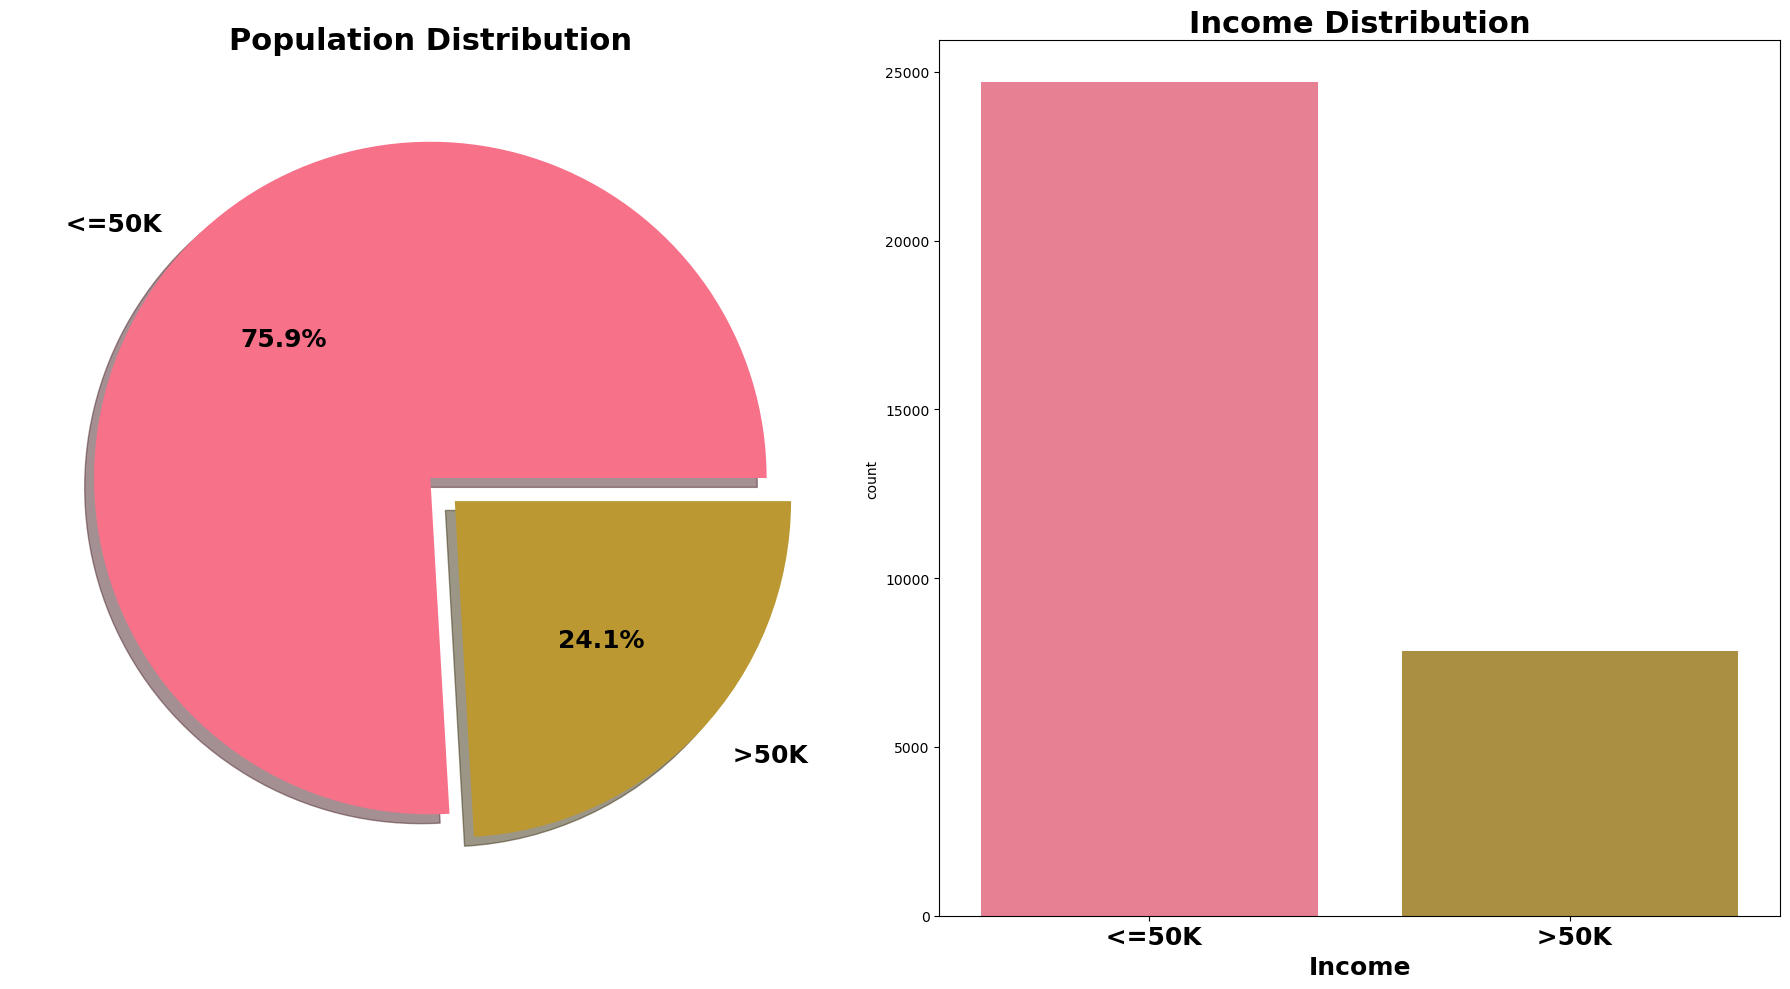

In [298]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,10))
df['Income'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x = 'Income',data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation :
- 75.9 % population (24697 peoples) have income less than 50K.
- Our task is to predict income and we see that target variable income is imbalanced.

<b> Let check each feature against Target variable to gain more insight into data before finding answer of important questions. </b>

<Axes: xlabel='Age', ylabel='count'>

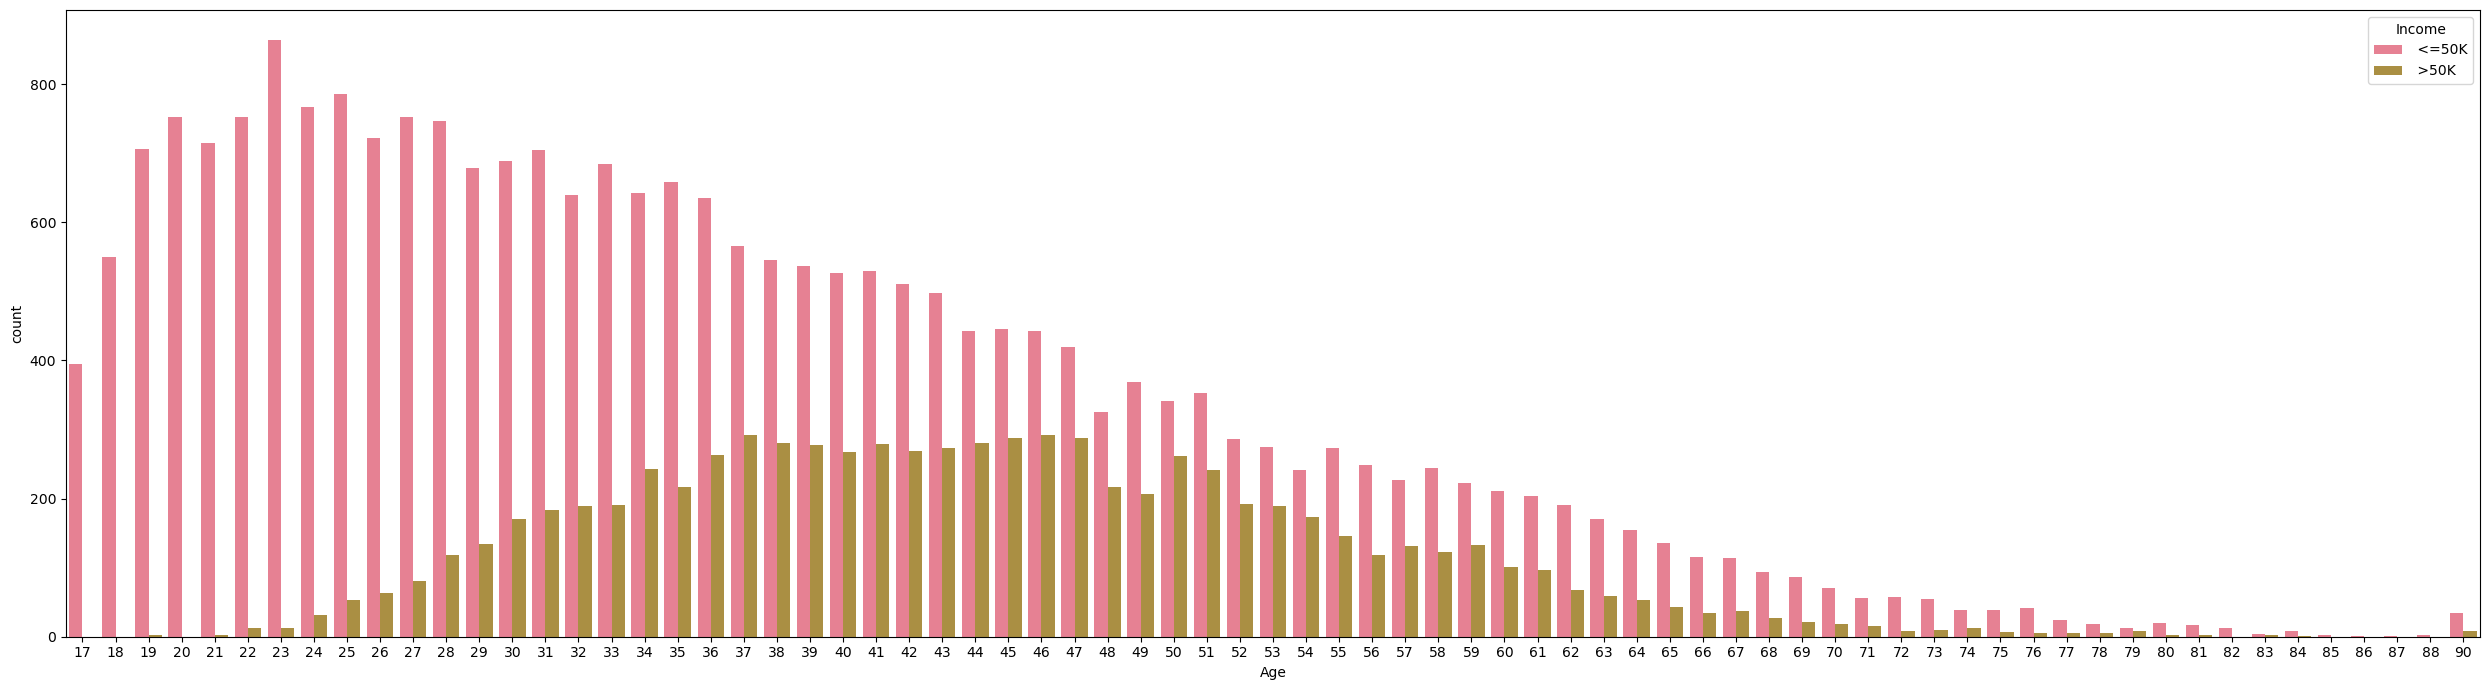

In [299]:
plt.figure(figsize = (25,7))
sns.countplot(x="Age",hue ="Income",data =df)


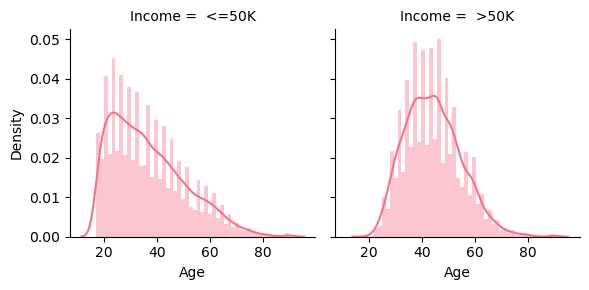

In [300]:
ax = sns.FacetGrid(df,col ="Income")
ax.map(sns.distplot,'Age')
plt.tight_layout()

#### Observation:
<b> Here comes an interesting observation. We already know that only 24% people earnings more than 50K dollors and this plot tell us which age group then belong. </b>
- almost 10 % people in age group of 19-30 earns more than 50 K dollars and this count drop even more in old peoples having age greater than 70.<b> Might be some lucky old ones has created good Retirement Plan compare to rest old peoples.</b>
- We can find maximum people earning more than 50K dollors belong to age group 41-50 & 51-60. <u> It will be interesting to find out which profession lead this income to this category.</u>

### So let dive into workclass and see what insight we get from there.

<Axes: xlabel='Workclass', ylabel='count'>

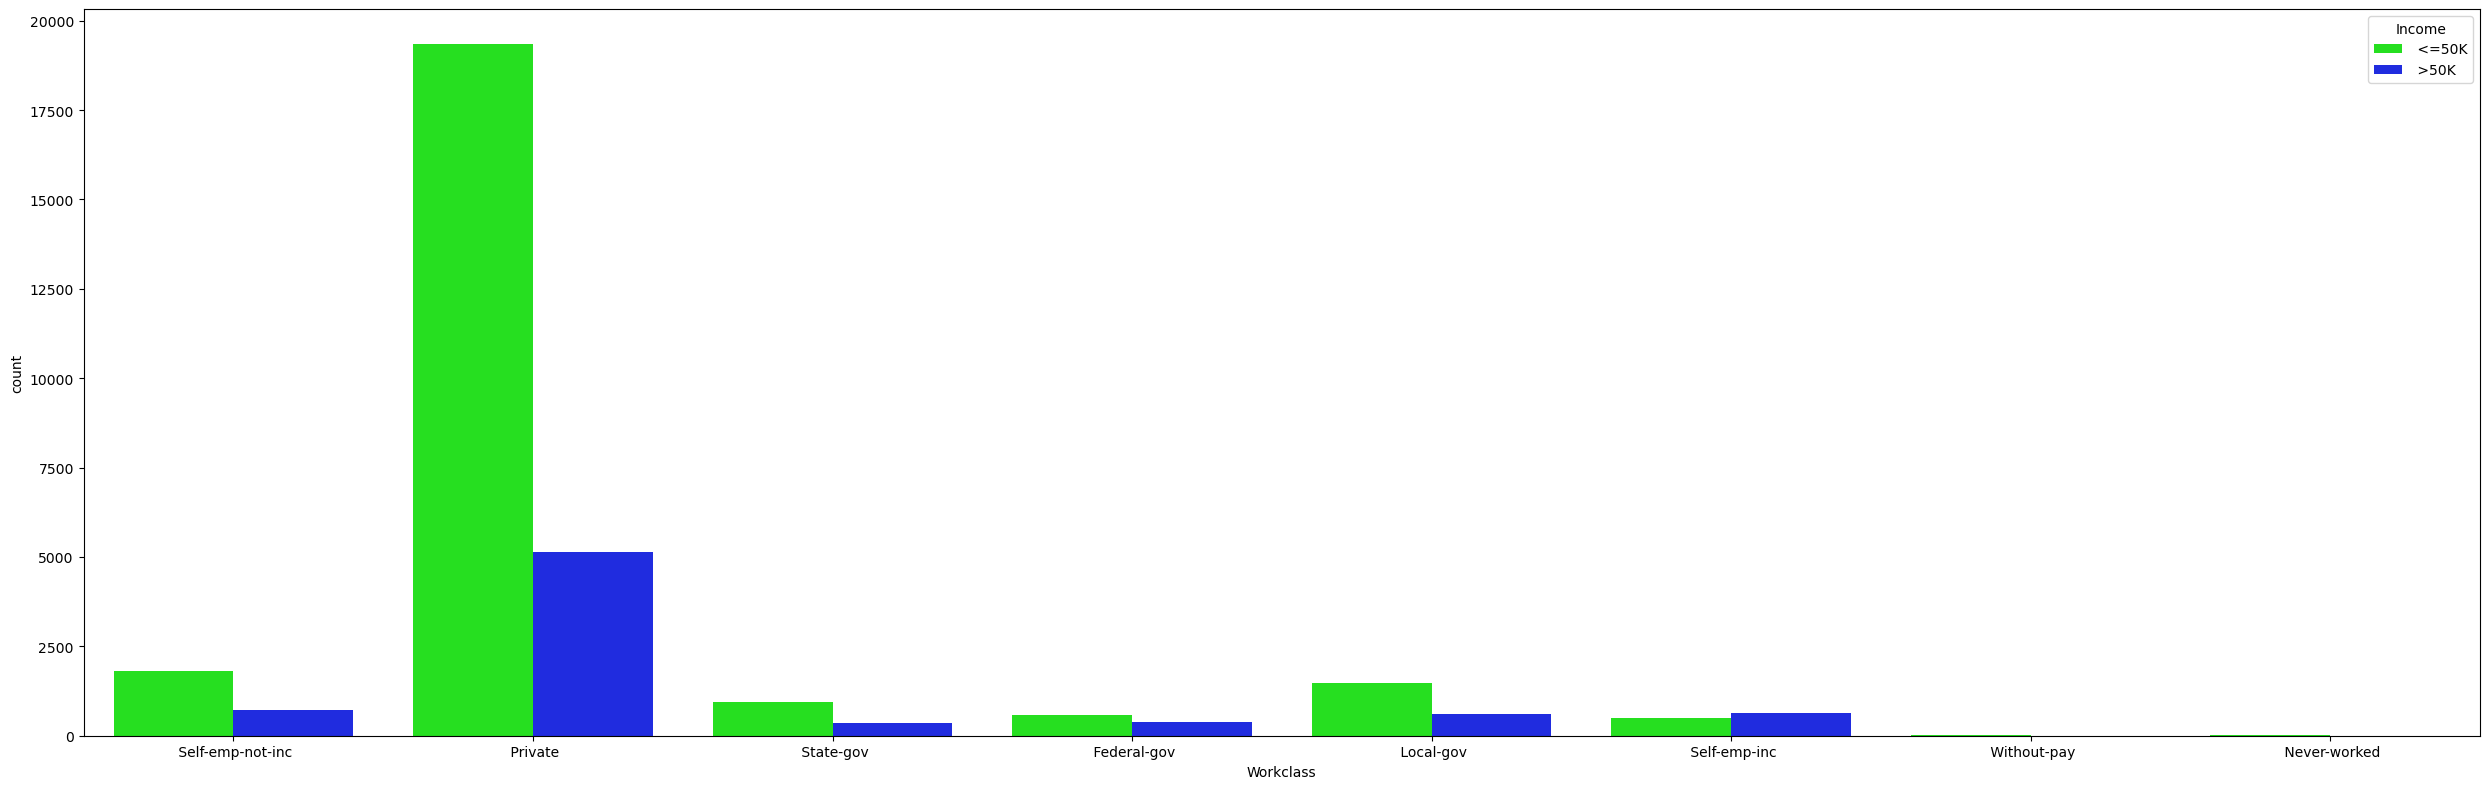

In [301]:
plt.figure(figsize = (25,8))
sns.countplot(x= df['Workclass'],hue=df['Income'],palette ='hsv')

<Axes: ylabel='count'>

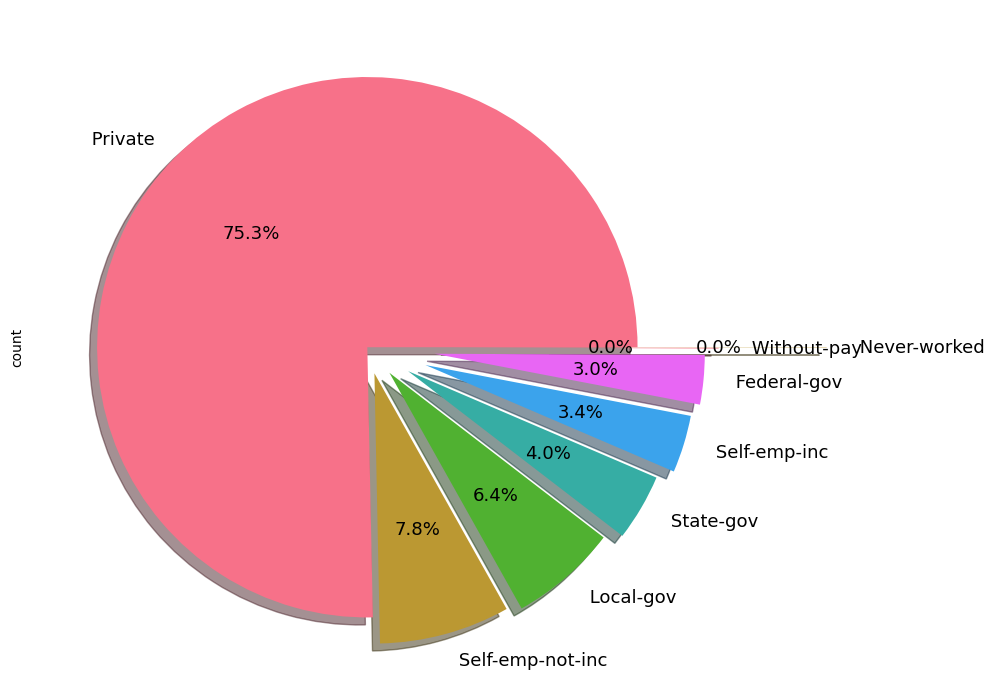

In [302]:
plt.figure(figsize=(10,10))
df['Workclass'].value_counts().plot.pie(explode=[0,0.1,0.125,0.175,0.225,0.25,0.3,0.7],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, shadow=True)

In [303]:
pd.crosstab(df["Income"],df['Workclass'],margins = True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Income,,,,,,,,,
<=50K,589,1476,7,19357,494,1816,944,14,24697
>50K,371,617,0,5152,622,724,353,0,7839
All,960,2093,7,24509,1116,2540,1297,14,32536


#### Observation :
- 75.3% people belongs to Private sector followed by Self Emplyoed not Incorporated with 7.8 %
- <b><em>Interseting observation comes with <u> Self-Employed Incorporated </u> category where the number of people who earn more than 50K dollars exceed those earning less than it ! </em></b>
    
- There is significant difference between private sector employees income where <u> less than 25 % people earn more than 50K dollars an year.</u> 
- Another quite surprising insight comes from Federal Goverment countplot where <b><em> We can see very minute difference between the number of people whose income is more or less than 50K dollars an year.</em></b> Same goes with state goverment with some difference. 
    
- Yes there exist category for who never worked and Working without pay but very few people belong to it.These people may be unempolyeed or colleges students. But Number is less And thats Good !!!

<b><em>Certainly Goverment Emplyoees have high wages compare to private !!!</em></b>

<Axes: ylabel='count'>

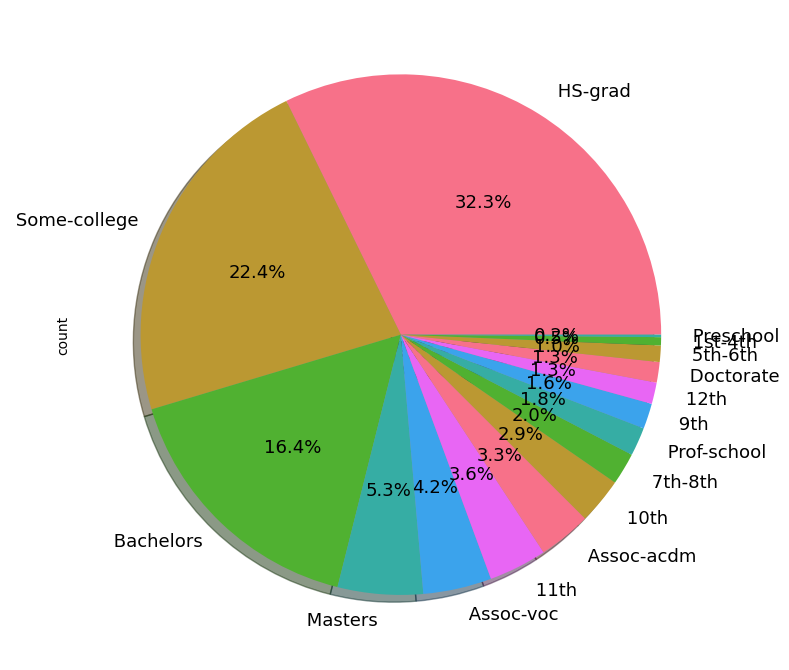

In [304]:
plt.figure(figsize = (8,8))
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)

<Axes: xlabel='Education', ylabel='count'>

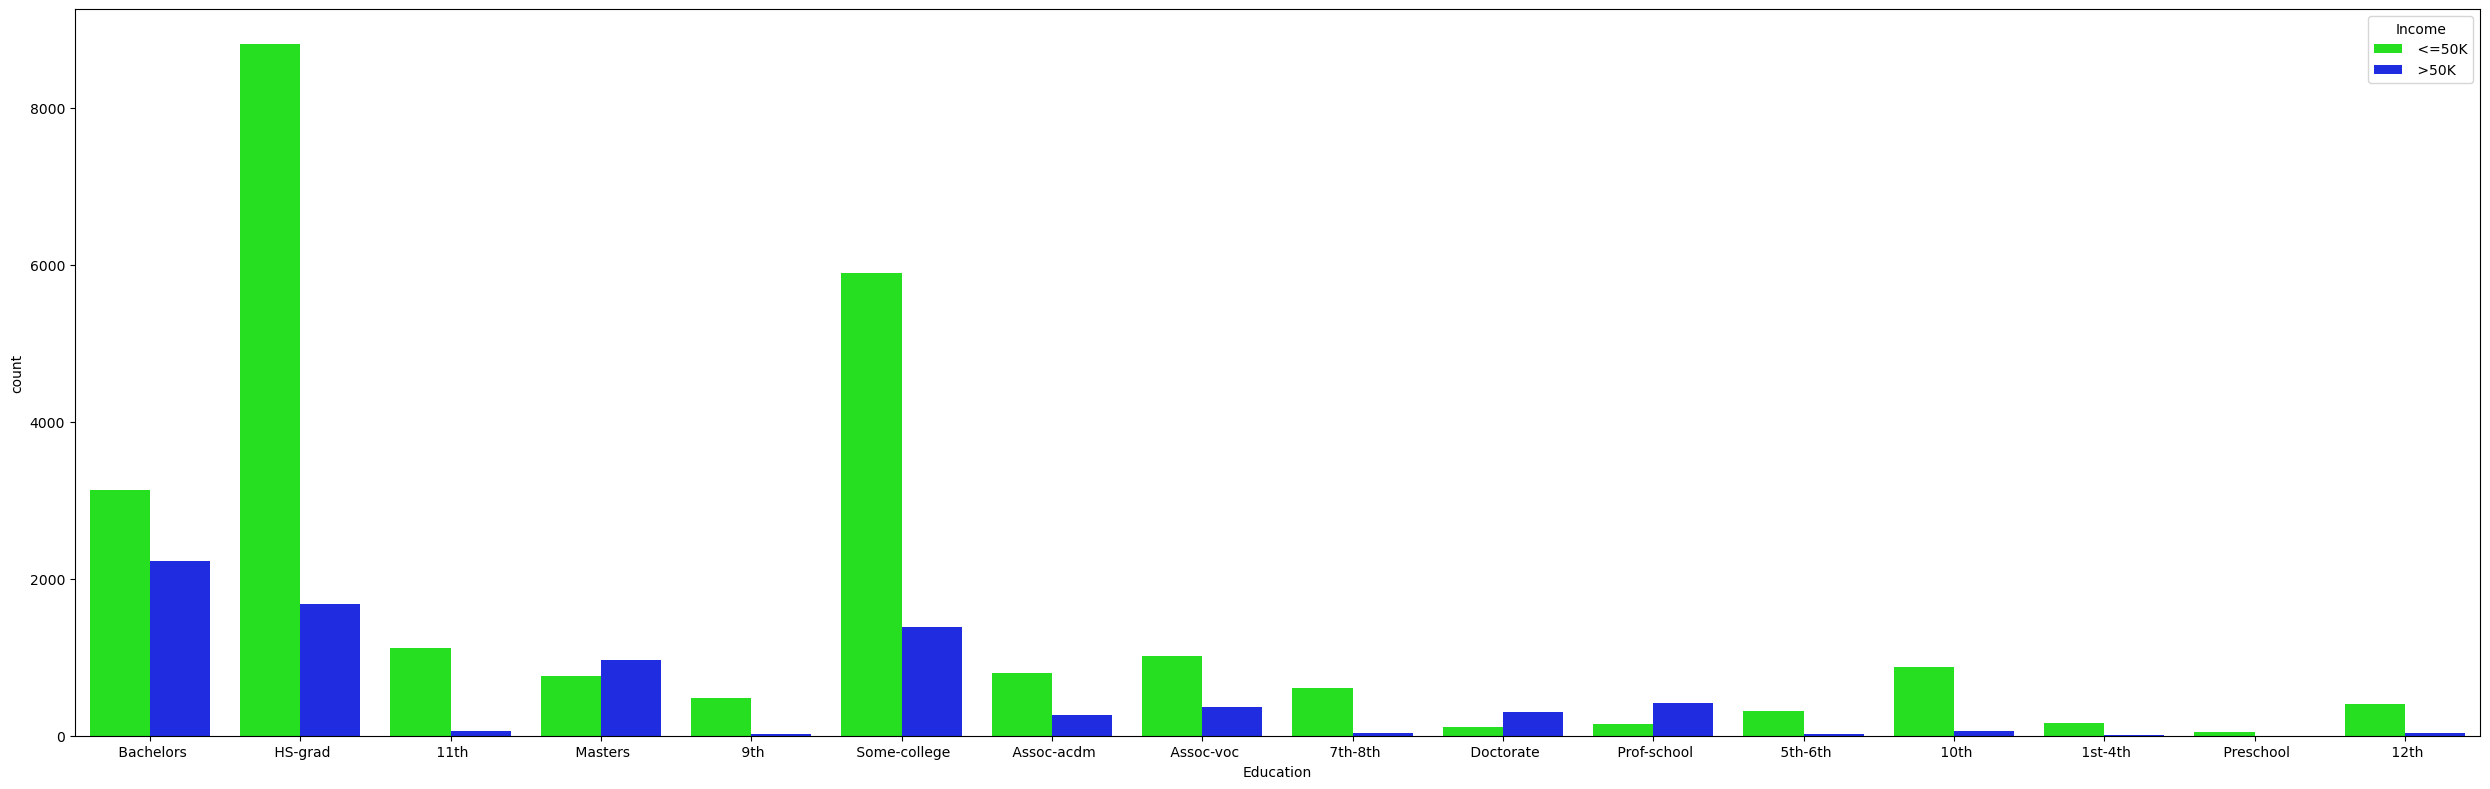

In [305]:
plt.figure(figsize =(25,8))
sns.countplot(x =df['Education'], hue=df['Income'], palette='hsv')

#### Observation:
- Out of all population 32.3% people with HS-Grad education which is most prevalent education level.
- 5.3 % people with masters and 1.3 % population is Doctorate degree holder. Highly educated & intellactual people belongs to this category.
- There are very handful people who earn more than 50 K dollars having education below 12th level.
- Maximum number of people who earn more than 50K dollars are Bachelors degree holder.
- <b> Here comes interesting observation about income of highly educated people. In case of people belonging to Masters, Doctorate and Prof-School category in the education level, the number people earning more than 50K dollars an year outnumber than the number of people earning less than it.</b>
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year!

In [306]:
pd.crosstab(df['Education'],df["Workclass"], margins=True)

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,All
Education,,,,,,,,,
10th,6,31,2,795,19,67,13,0,933
11th,9,36,1,1041,14,60,14,0,1175
12th,5,19,0,373,7,19,10,0,433
1st-4th,0,4,0,146,2,13,1,0,166
5th-6th,1,9,0,295,4,19,4,0,332
7th-8th,2,28,1,495,14,94,10,1,645
9th,3,23,0,438,10,34,6,0,514
Assoc-acdm,55,88,0,776,35,71,41,1,1067
Assoc-voc,38,86,0,1066,38,108,46,0,1382


<Axes: xlabel='Marital_status', ylabel='count'>

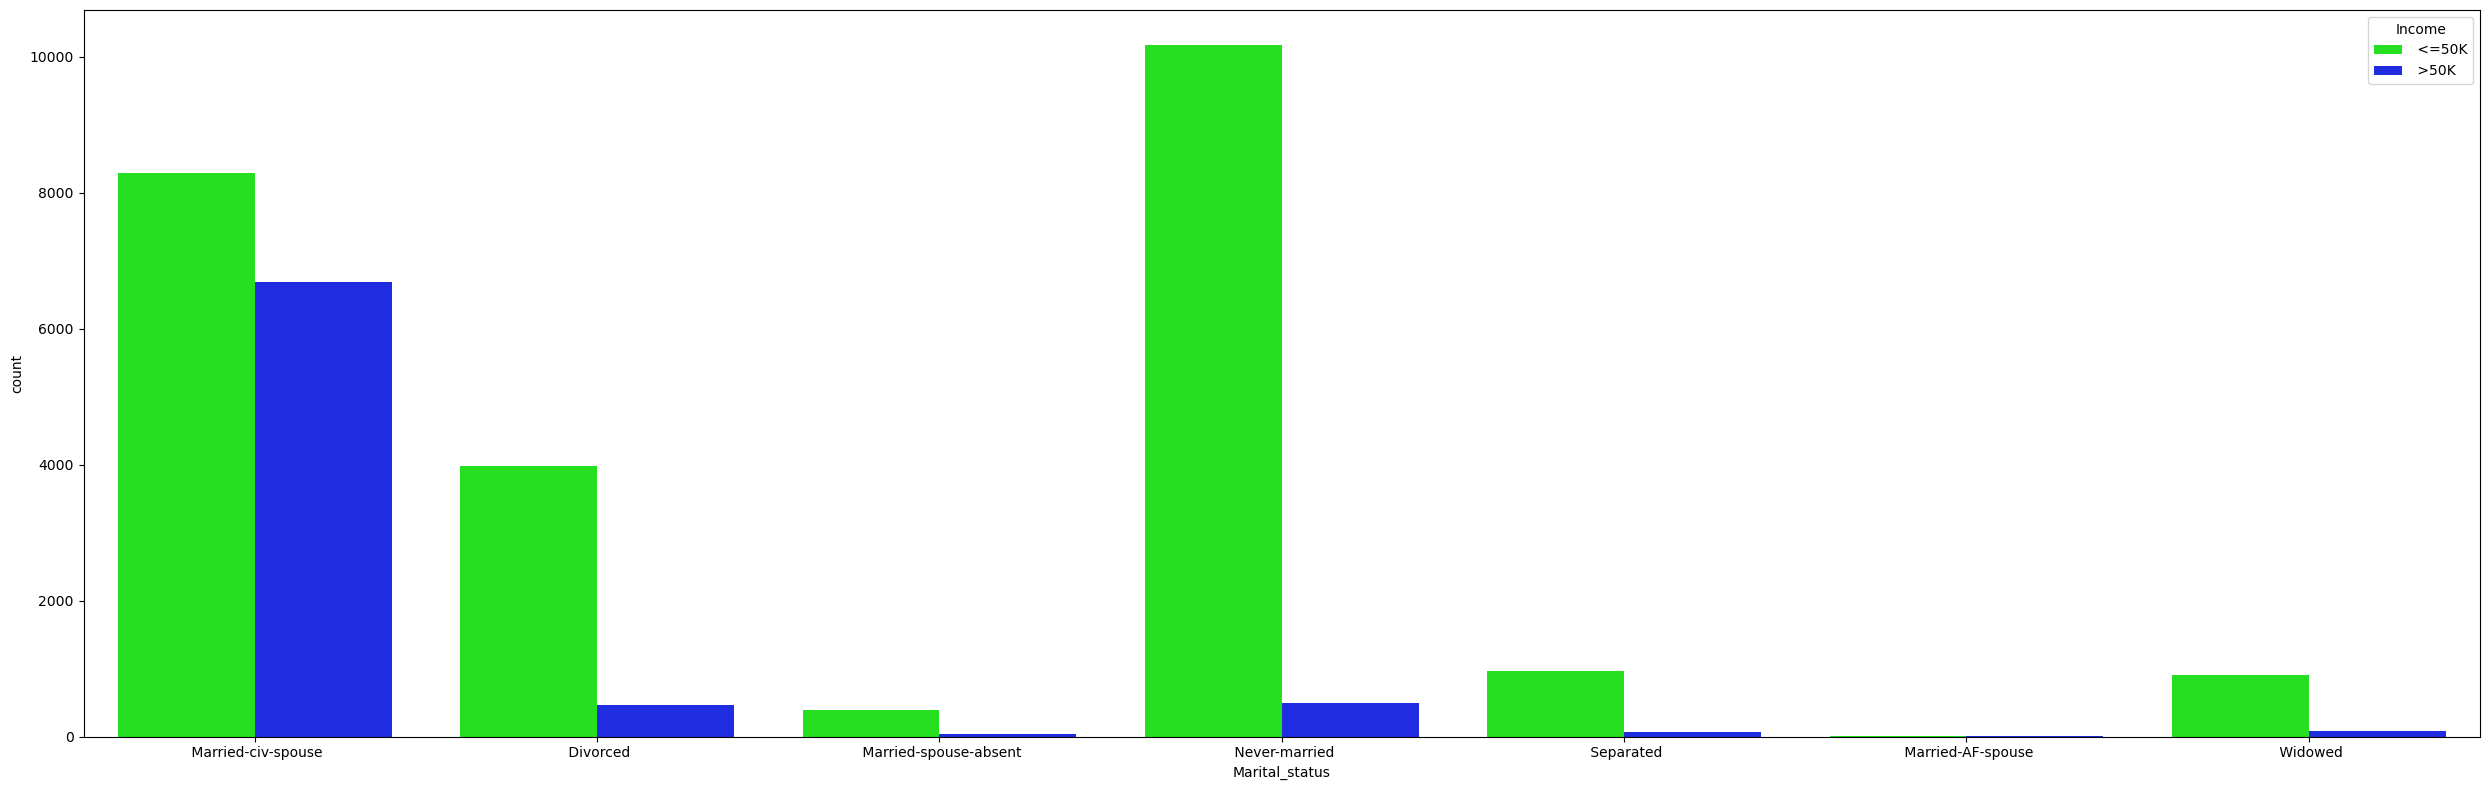

In [307]:
plt.figure(figsize =(25,8))
sns.countplot(x =df['Marital_status'], hue=df['Income'], palette='hsv')

#### Observation :
<b> Married people are most like to earn more than 50K dollars an year.

<Axes: ylabel='count'>

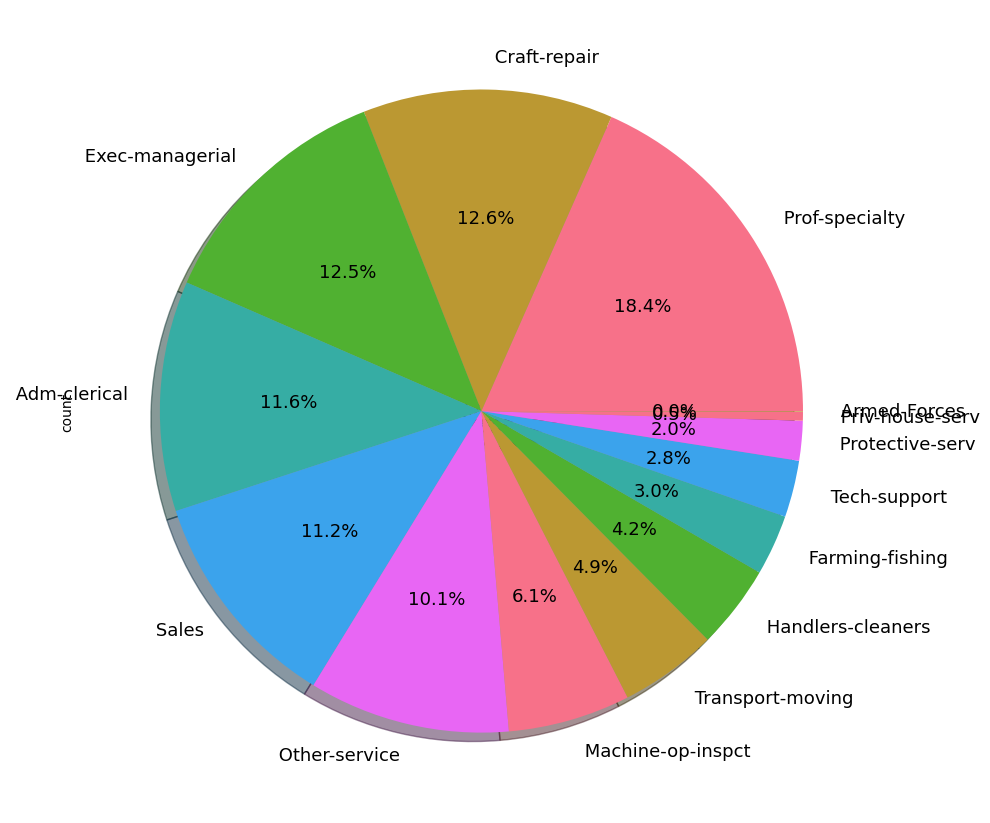

In [308]:
plt.figure(figsize=(10,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontsize':13}, shadow=True)

<Axes: xlabel='Occupation', ylabel='count'>

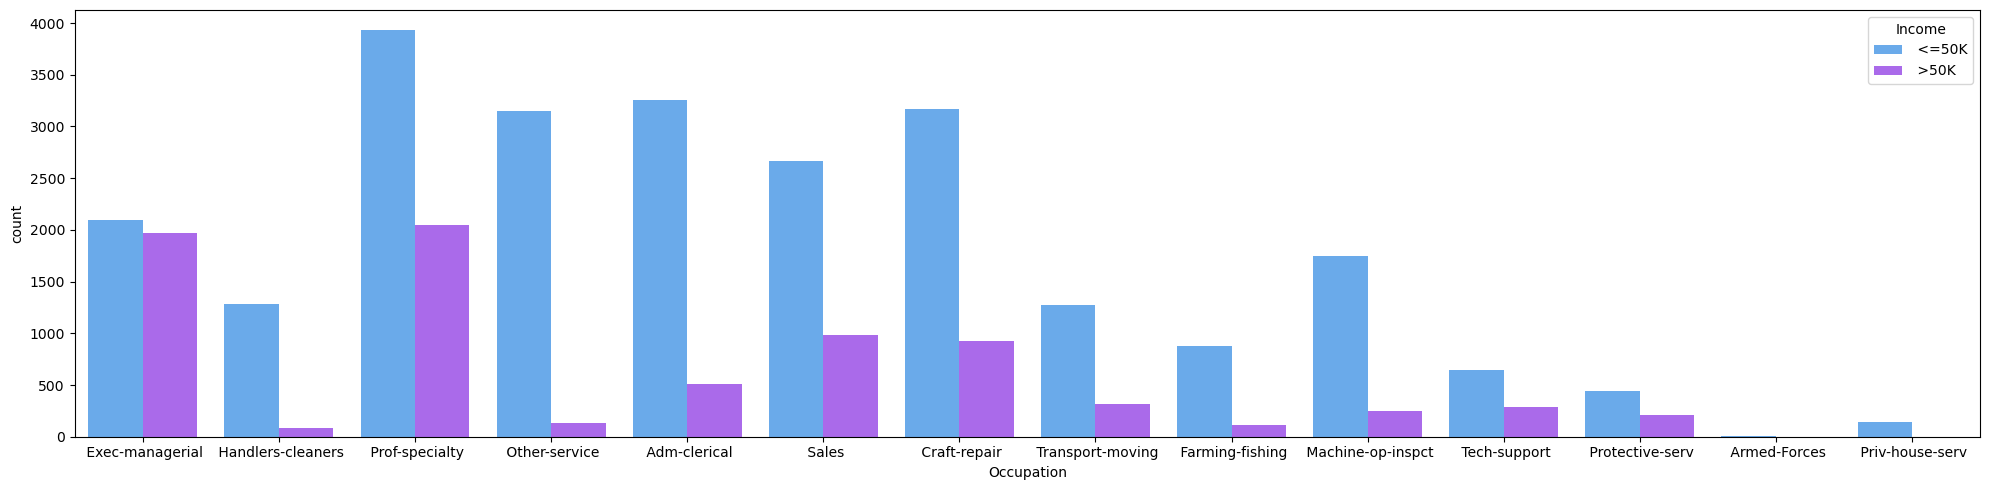

In [309]:
plt.figure(figsize = (20,5))
sns.countplot(x = df['Occupation'], hue=df['Income'], palette='cool')

#### Observation :
- Exec-managerial role are equally likely to earn more than 50K dollars an year.
- Peoples working in Arm- Forces, Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Handlers-cleaners are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.


<Axes: ylabel='count'>

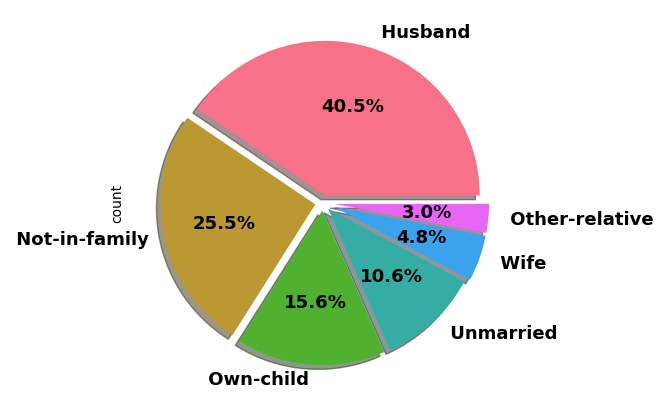

In [310]:
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)

<Axes: xlabel='Relationship', ylabel='count'>

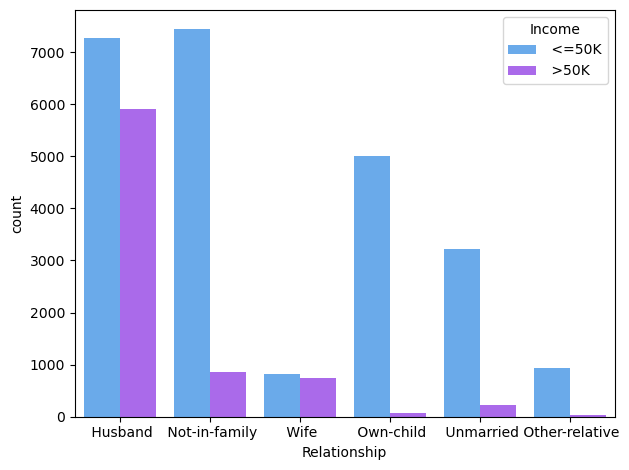

In [311]:
sns.countplot(x = df['Relationship'], hue=df['Income'], palette='cool')

#### Observation:
- Wives are equally likely to earn more than 50K dollars an year.
- For Husbands, although significant, there is less possibility of them to earn more than 50K dollars an year.
- There are just a handful of Unmarried people earning more than 50K dollars an year.

<Axes: ylabel='count'>

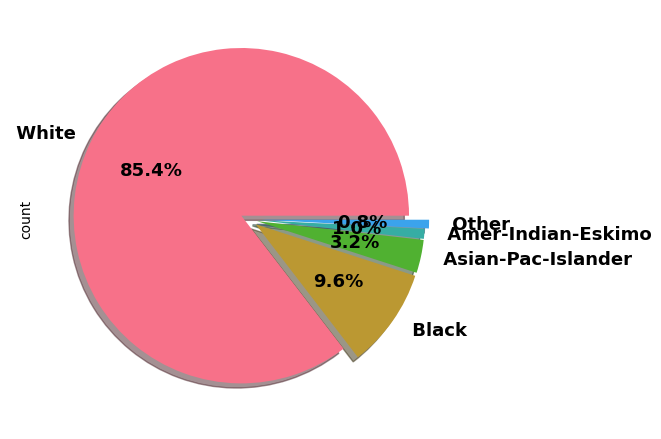

In [312]:
df['Race'].value_counts().plot.pie(autopct='%2.1f%%',explode=[0.05,0.05,0.05,0.05,0.075],
                                           textprops ={'fontweight' :'bold', 'fontsize':13}, shadow=True)

<Axes: xlabel='Race', ylabel='count'>

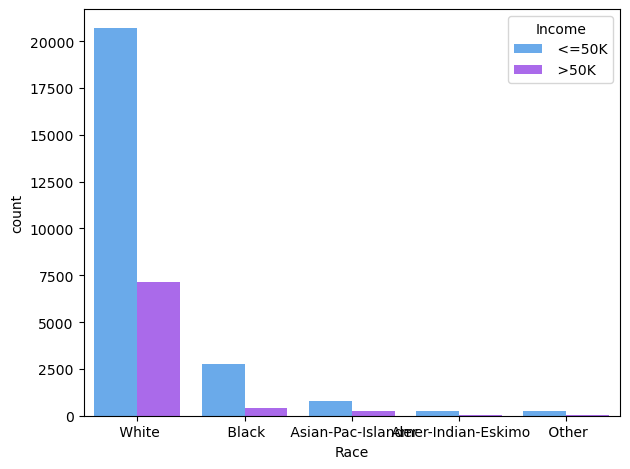

In [313]:
sns.countplot(x = df['Race'], hue=df['Income'], palette='cool')

#### Observation:
- 85.4 % peoples are whites followed by black community with 9.6%.
- Maximum peoples in Greater than 50K Club are White.
-<b> This observation is biased as we have very less data of other races. So Nothing Meaningful & reliable insight we can draw from it.</b>

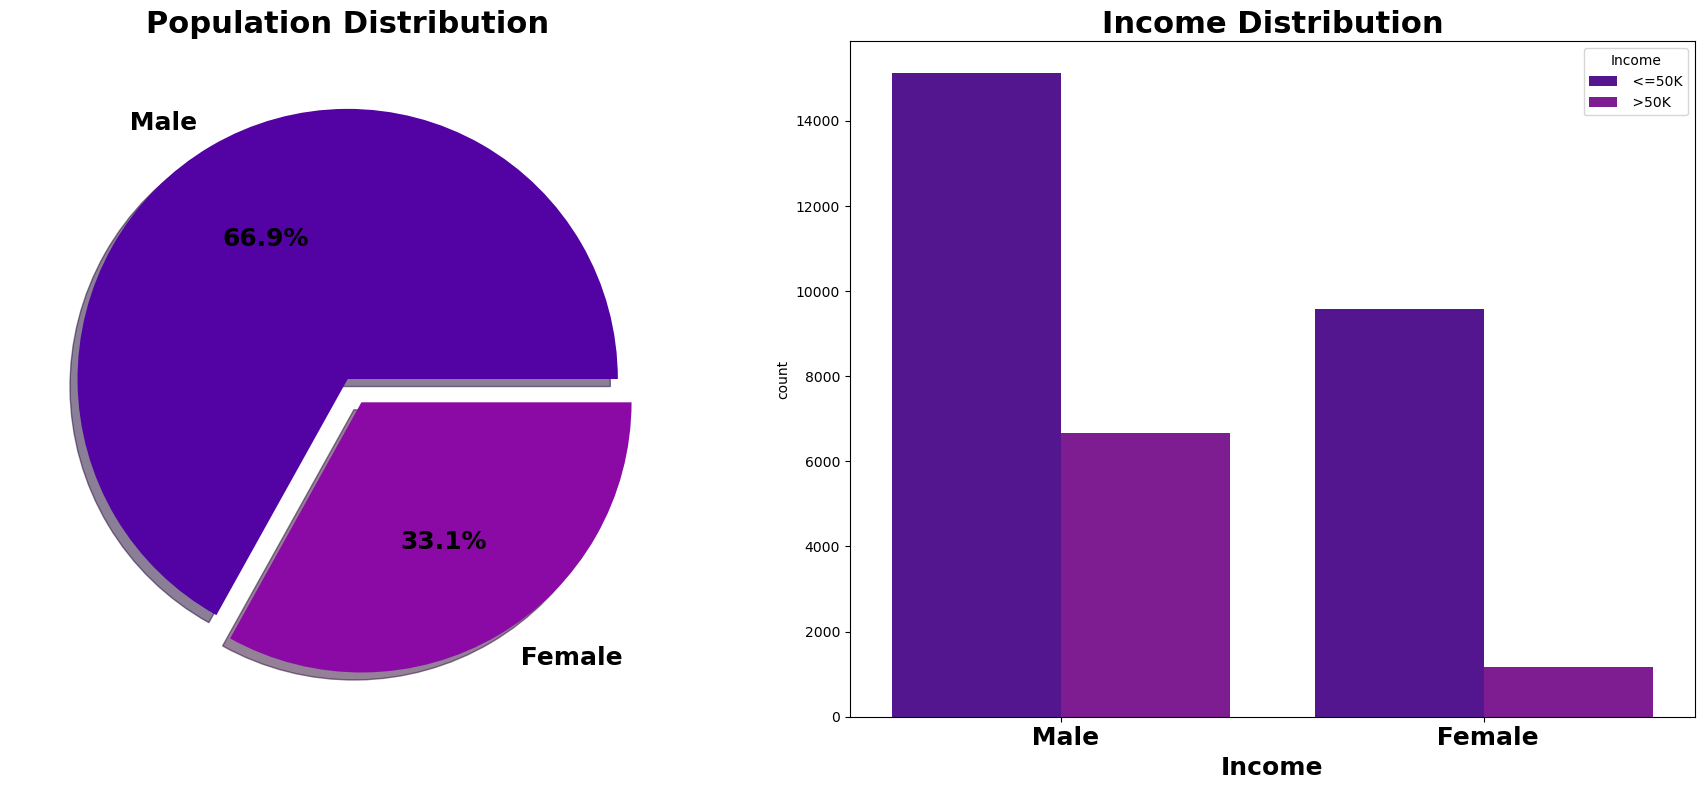

In [314]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Population Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x =df['Sex'],hue=df['Income'] ,data=df,ax=ax[1])
ax[1].set_title('Income Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Income",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
- Significant gap between male and female earnings.
- <b>Less than 10% Women in Greater Than 50K Dollar Club.</b>
- Around 33% of Men earning more than 50K dollars an year.

<b> Let find in which profession these women involved in . </b>

In [315]:
pd.crosstab(df['Occupation'],[df.Sex,df.Income], margins=True)

Sex                 Female         Male          All
Income               <=50K  >50K  <=50K  >50K       
Occupation                                          
 Adm-clerical         2323   212    937   295   3767
 Armed-Forces            0     0      8     1      9
 Craft-repair          202    20   2963   909   4094
 Exec-managerial       879   280   1218  1688   4065
 Farming-fishing        63     2    814   113    992
 Handlers-cleaners     160     4   1123    82   1369
 Machine-op-inspct     529    20   1222   229   2000
 Other-service        1748    51   1406    86   3291
 Priv-house-serv       138     1      8     0    147
 Prof-specialty       1917   437   2013  1612   5979
 Protective-serv        66    10    372   201    649
 Sales                1175    88   1492   895   3650
 Tech-support          302    45    342   238    927
 Transport-moving       81     9   1196   311   1597
All                   9583  1179  15114  6660  32536

#### Observation:
- Out of all population 33 % are womens. Inside that most of females work in Adm-clerical,Other-service,Prof-specialty.
- Same as in case of Men Maximum number in <u> Greater than 50K dollars Club in females comes from Prof-speciality,Exec-Managerial profession.</u>
- Maximum men work in Prof-Specialty.

<Axes: xlabel='Education', ylabel='Hours_per_week'>

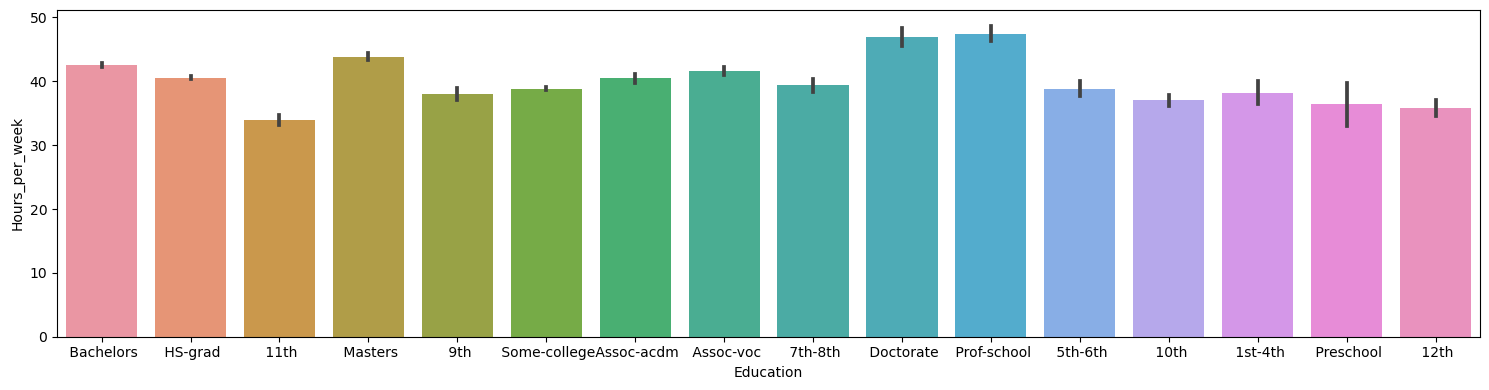

In [316]:
plt.figure(figsize = (15,4))
sns.barplot(x = df['Education'], y = df['Hours_per_week'], data = df)

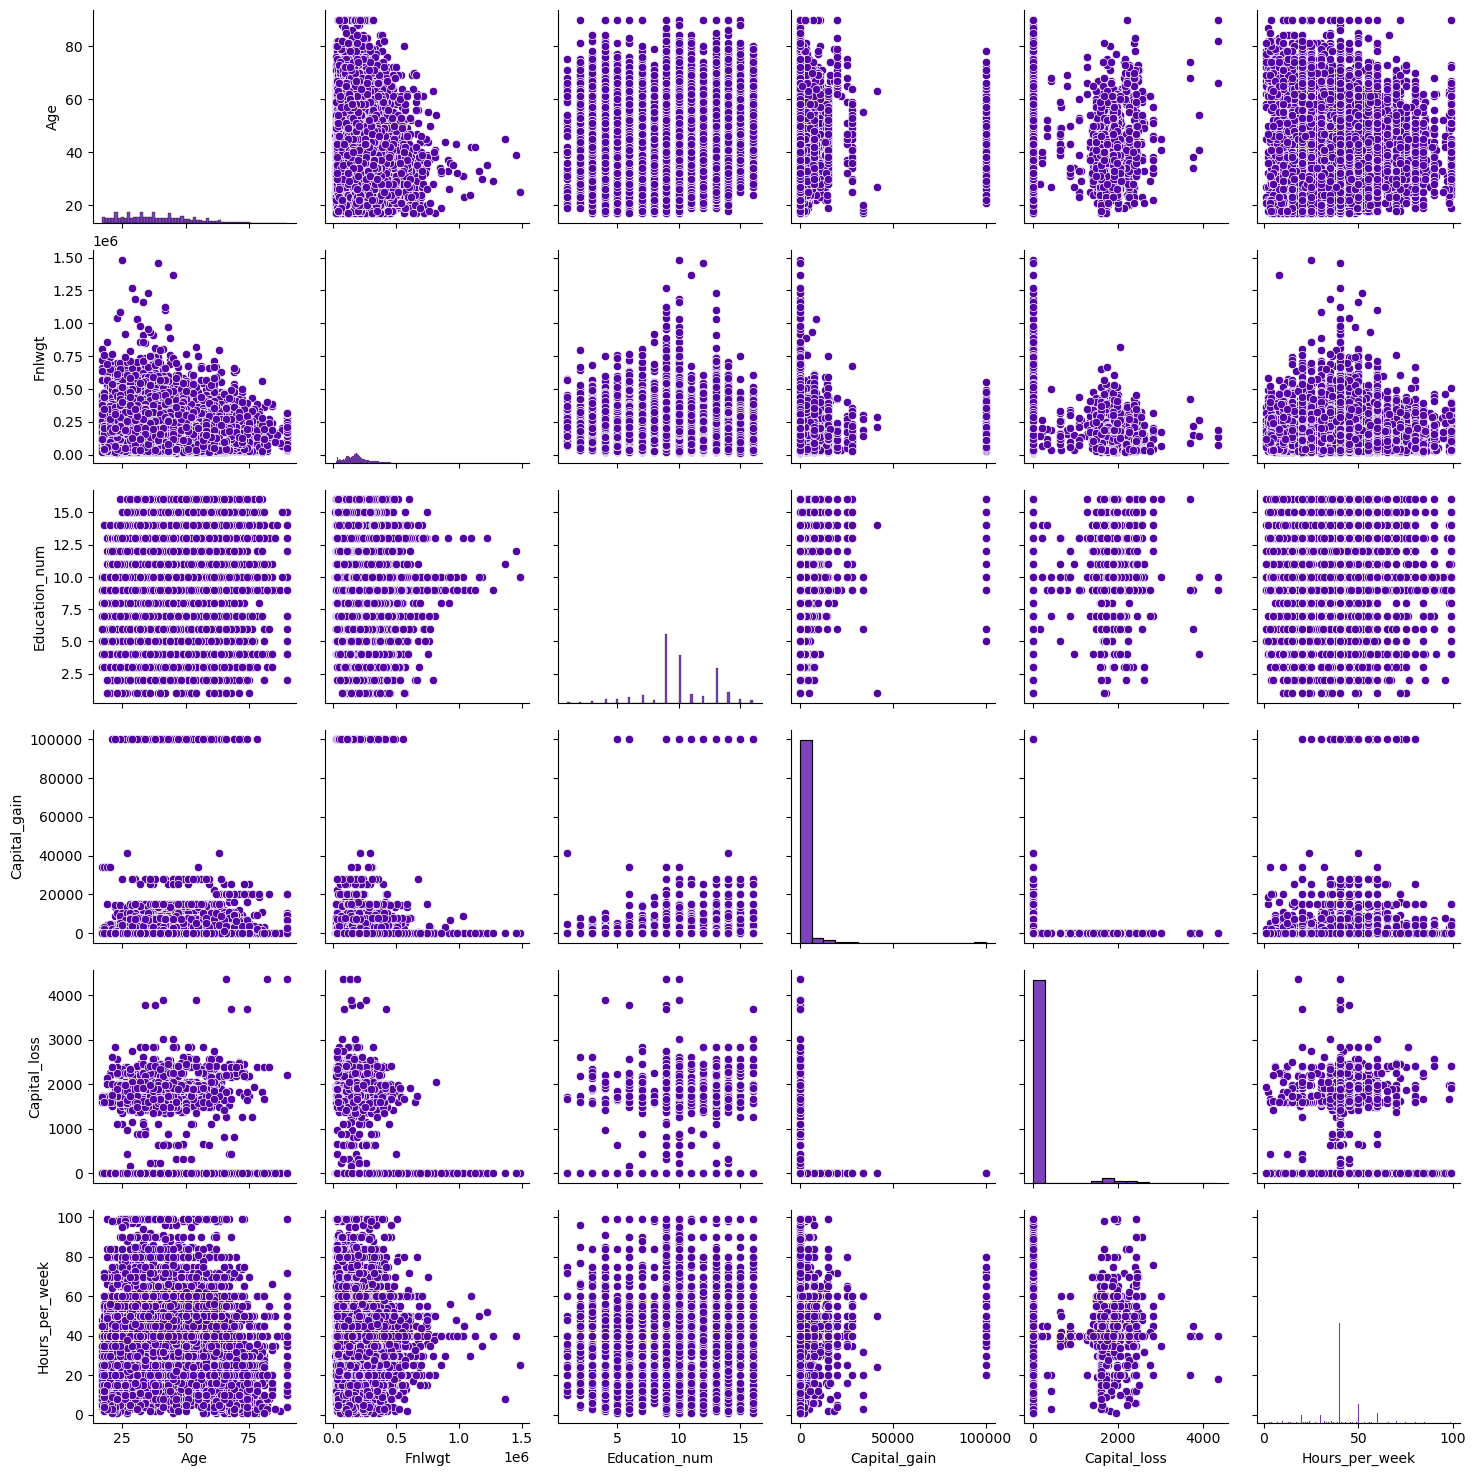

In [317]:
sns.pairplot(df)

In [318]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [320]:
#Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype =="object":
        df[i]= le.fit_transform(df[i])

In [321]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.094357,1.897843e+05,10.297547,10.081725,2.611384,6.139476,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.419136,0.240933
std,13.638193,1.107449,1.055563e+05,3.870195,2.571622,1.506304,3.973089,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,6.053903,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.369932e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


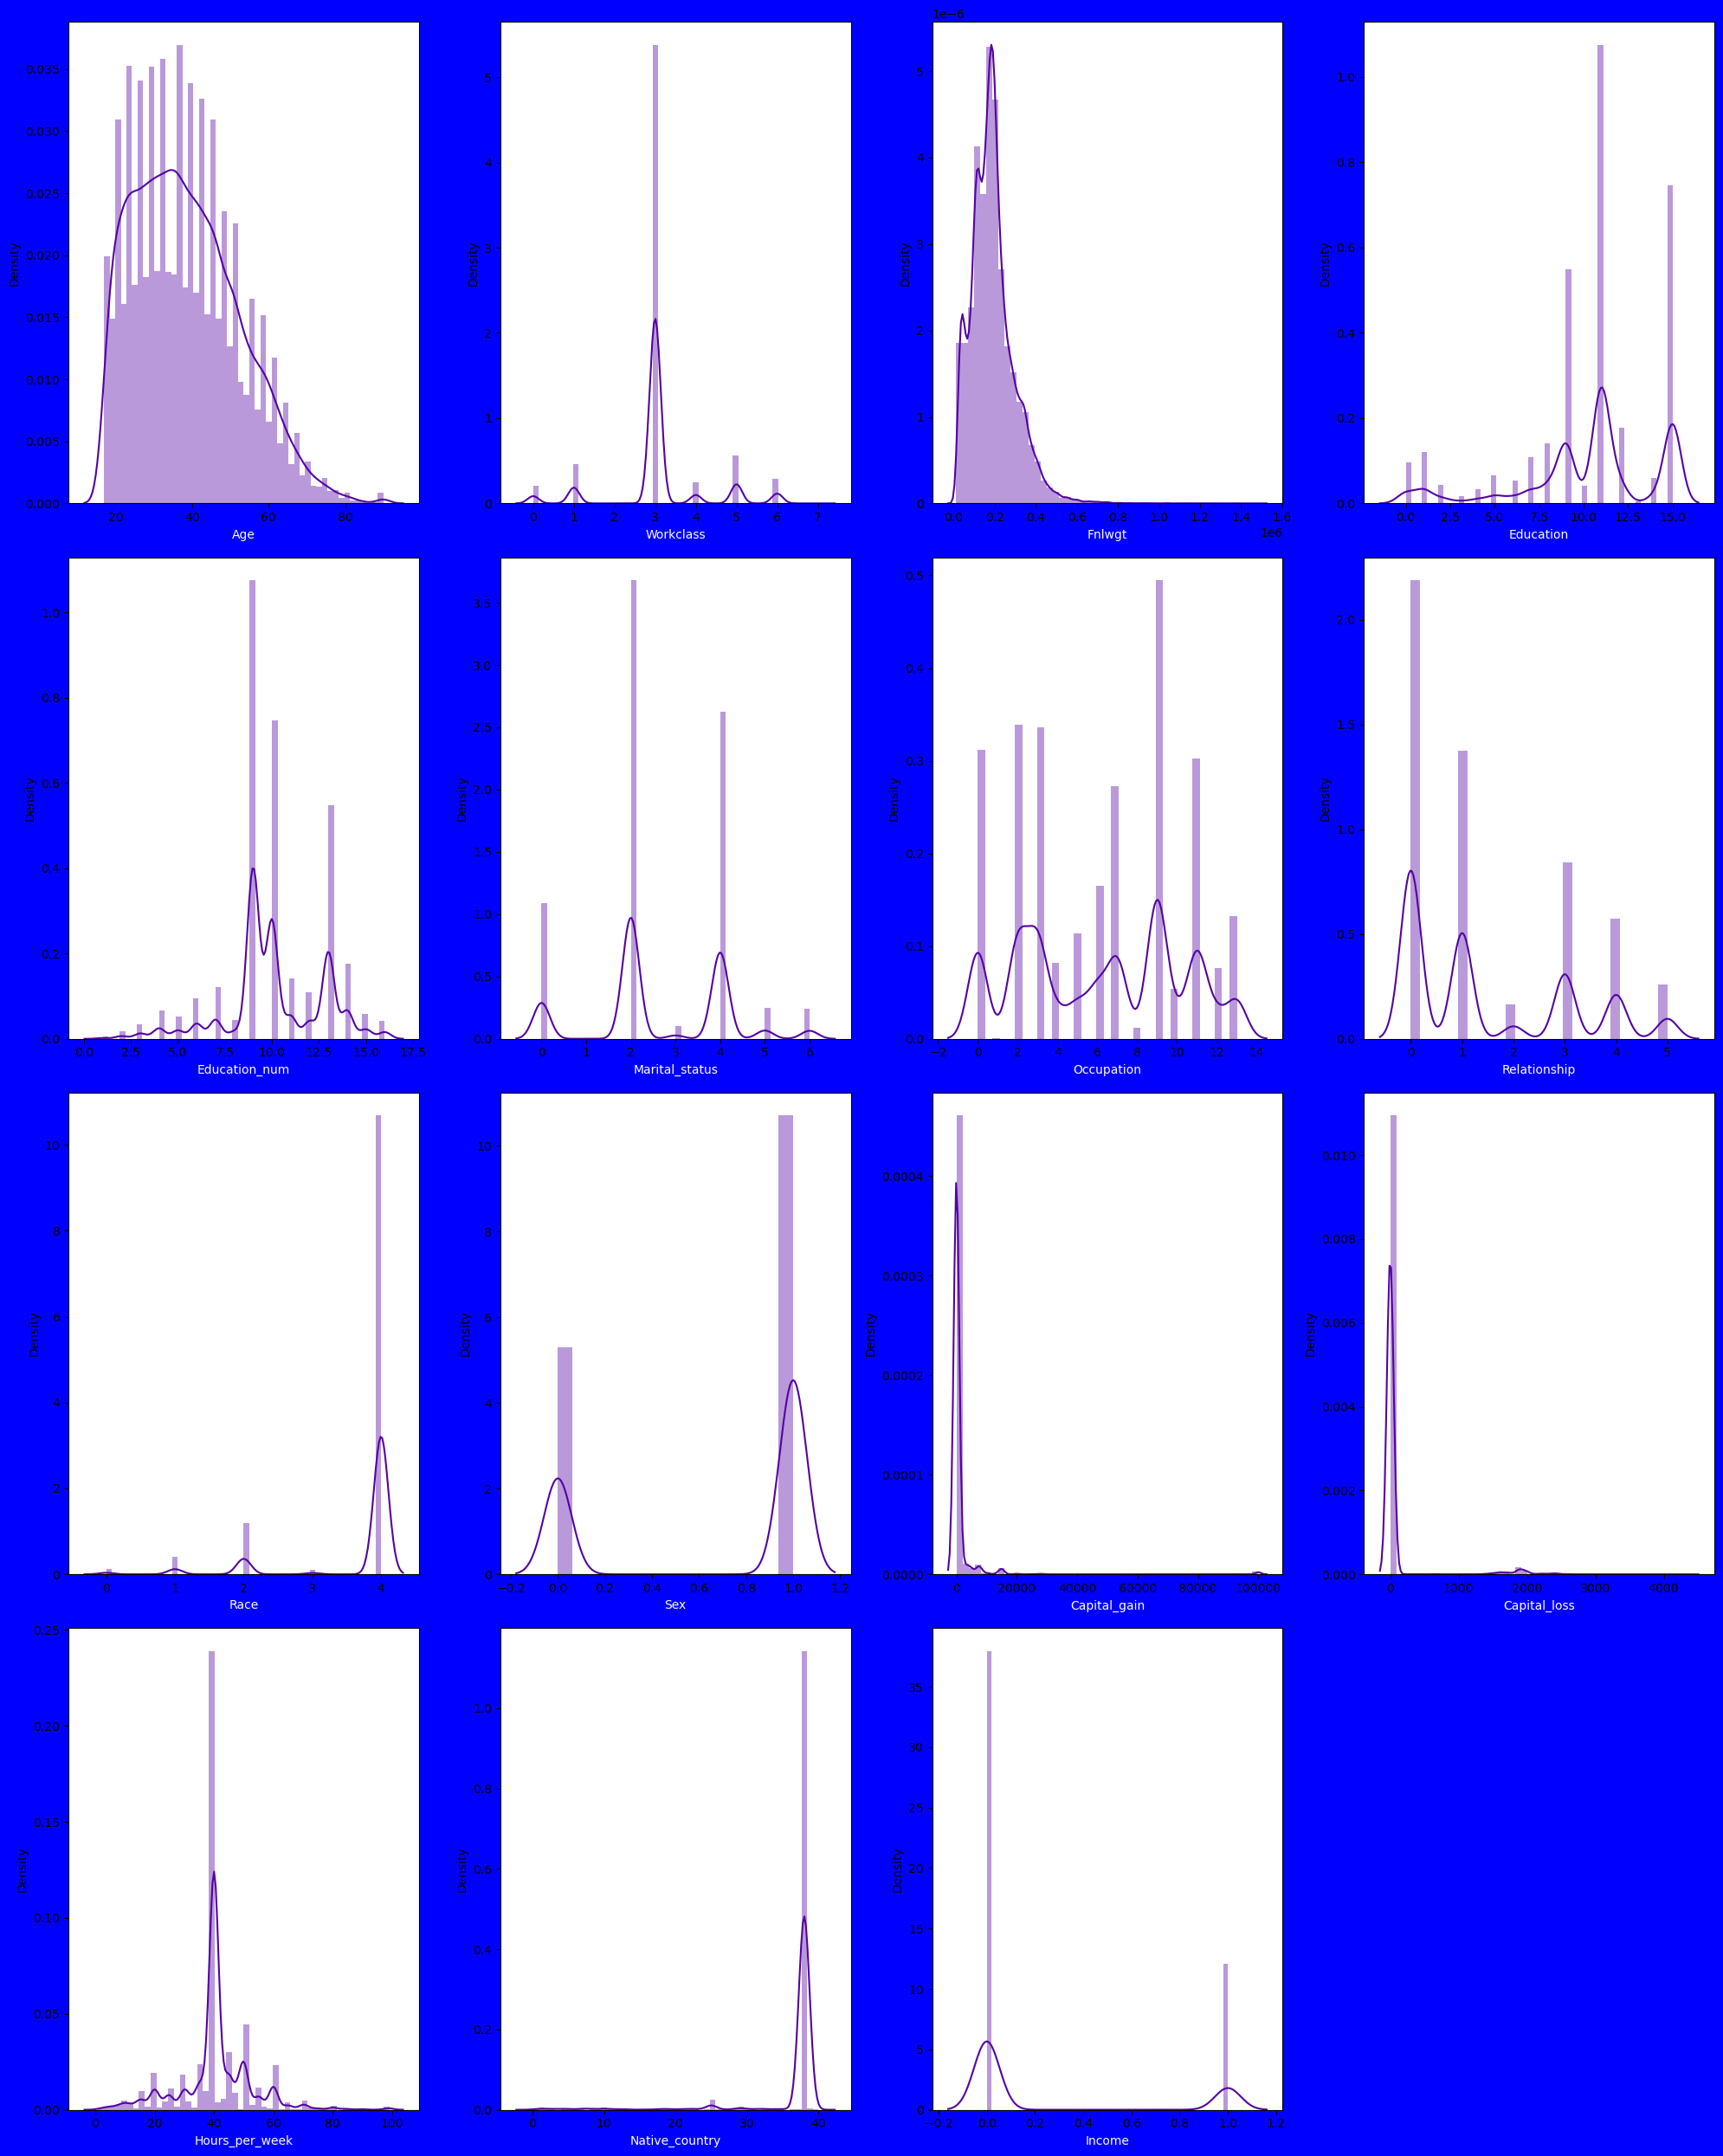

In [322]:
plt.figure(figsize = (20,25), facecolor = "blue")
plotnumber = 1

for column in df:
    if plotnumber<=len(df.columns):
        axs = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 10,color = "white")
    plotnumber +=1
plt.show()

In [323]:
df["Capital_gain"].value_counts()

Capital_gain
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [324]:
df["Capital_loss"].value_counts()

Capital_loss
0       31017
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

In [325]:
#Droping The Outliers USing ZStats
from scipy.stats import zscore
z_score = zscore(df[["Fnlwgt","Capital_loss","Capital_gain"]])
abs_z_score = np.abs(z_score)
filtering = (abs_z_score<3).all(axis = 1)
df =df[filtering]
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000,30517.000000
mean,38.425927,3.092375,185200.951142,10.279189,10.023397,2.624275,6.128093,1.471377,3.664548,0.662909,570.892257,1.195793,40.245044,36.414851,0.222368
std,13.680039,1.103305,94709.376778,3.895599,2.545221,1.516198,3.974251,1.607736,0.851717,0.472724,2339.107188,32.428979,12.316847,6.054954,0.415844
min,17.000000,0.000000,12285.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,27.000000,3.000000,117444.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,177629.000000,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,3.000000,234648.000000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,506436.000000,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,22040.000000,1258.000000,99.000000,40.000000,1.000000


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30517 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30517 non-null  int64
 1   Workclass       30517 non-null  int32
 2   Fnlwgt          30517 non-null  int64
 3   Education       30517 non-null  int32
 4   Education_num   30517 non-null  int64
 5   Marital_status  30517 non-null  int32
 6   Occupation      30517 non-null  int32
 7   Relationship    30517 non-null  int32
 8   Race            30517 non-null  int32
 9   Sex             30517 non-null  int32
 10  Capital_gain    30517 non-null  int64
 11  Capital_loss    30517 non-null  int64
 12  Hours_per_week  30517 non-null  int64
 13  Native_country  30517 non-null  int32
 14  Income          30517 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.7 MB


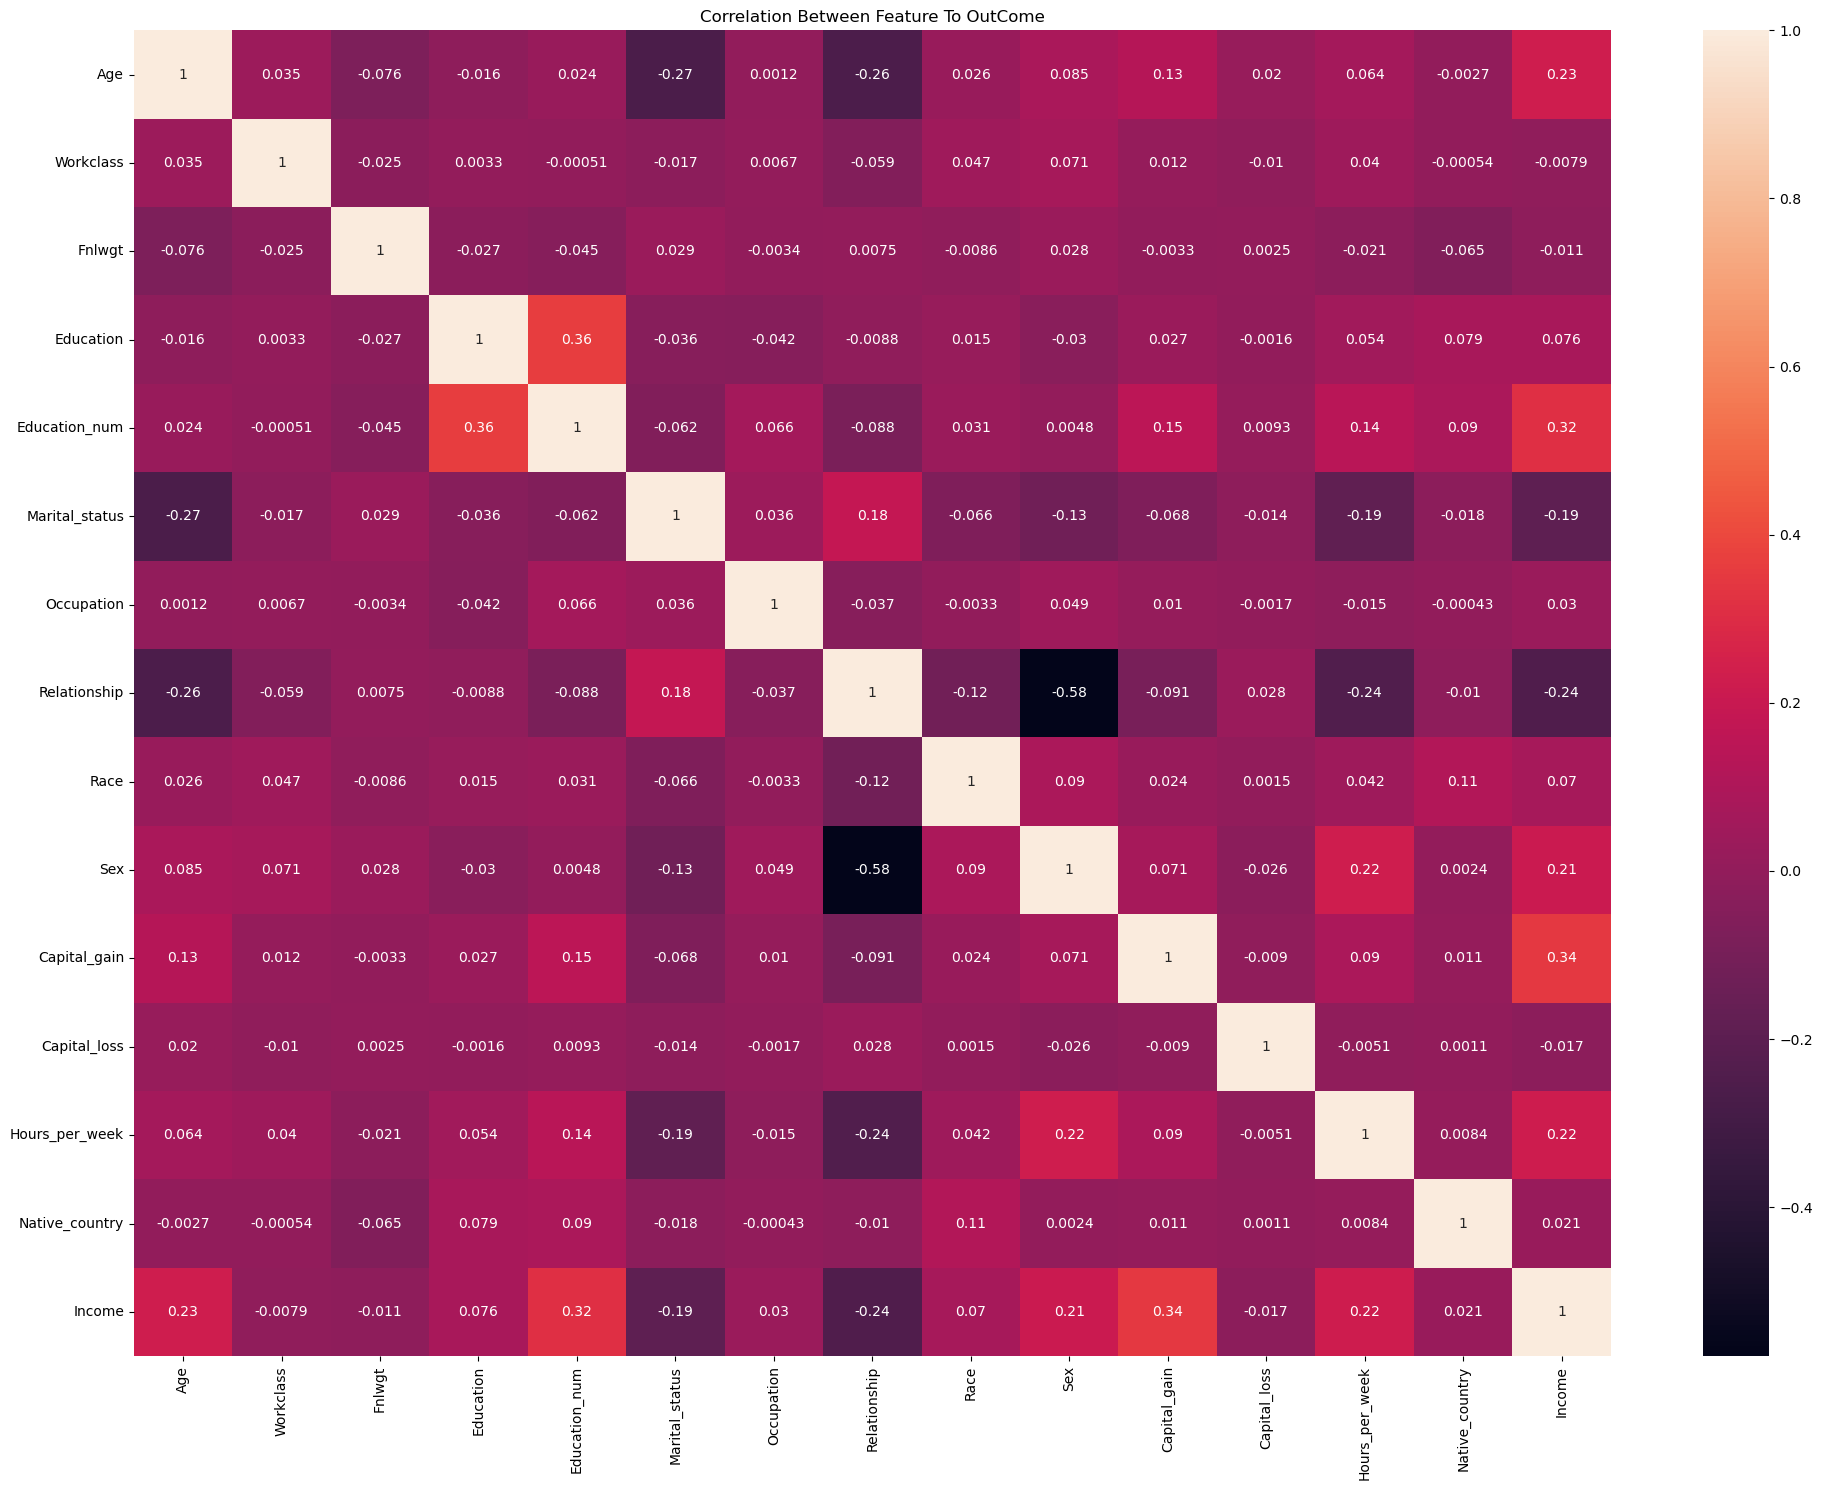

In [327]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.title("Correlation Between Feature To OutCome")
plt.show()

In [328]:
y = df['Income']
X = df.drop(columns = 'Income')

In [329]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [330]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({"Features":X.columns,"Vif":[variance_inflation_factor(X,i) for i in range(X.shape[1])]})
vif

,Features,Vif
0,Age,1.165936
1,Workclass,1.009004
2,Fnlwgt,1.014089
3,Education,1.163748
4,Education_num,1.219880
5,Marital_status,1.127363
6,Occupation,1.014928
7,Relationship,1.667244
8,Race,1.031914
9,Sex,1.547887


In [331]:
from sklearn.feature_selection import SelectKBest,f_classif
best_f = SelectKBest(score_func = f_classif, k=10)
fit = best_f.fit(X,y)
selected_ind = fit.get_support(indices = True)
selected_features = X.columns[selected_ind]
print(selected_features)

Index(['Age', 'Education', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Hours_per_week'],
      dtype='object')


In [332]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [333]:
X =X[['Age', 'Education', 'Education_num', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital_gain', 'Hours_per_week']]

In [334]:
X

,Age,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Hours_per_week
0,0.846069,-0.328373,1.169506,-0.411744,-0.787103,-0.915200,0.393861,0.713093,-0.244068,-2.212051
1,-0.031135,0.185035,-0.402092,-1.730854,-0.283855,-0.293198,0.393861,0.713093,-0.244068,-0.019895
2,1.065371,-2.382006,-1.187891,-0.411744,-0.283855,-0.915200,-1.954376,0.713093,-0.244068,-0.019895
3,-0.762139,-0.328373,1.169506,-0.411744,0.722640,2.194813,-1.954376,-1.402341,-0.244068,-0.019895
4,-0.104236,0.441739,1.562406,-0.411744,-0.787103,2.194813,0.393861,-1.402341,-0.244068,-0.019895
...,...,...,...,...,...,...,...,...,...,...
30512,-0.835240,-0.841781,0.776607,-0.411744,1.477512,2.194813,0.393861,-1.402341,-0.244068,-0.182277
30513,0.115065,0.185035,-0.402092,-0.411744,-0.032231,-0.915200,0.393861,0.713093,-0.244068,-0.019895
30514,1.430873,0.185035,-0.402092,2.226477,-1.541974,1.572811,0.393861,-1.402341,-0.244068,-0.019895
30515,-1.200742,0.185035,-0.402092,0.907366,-1.541974,0.950808,0.393861,0.713093,-0.244068,-1.643714


In [335]:
from imblearn.over_sampling import SMOTE
sm =SMOTE()
X,y = sm.fit_resample(X,y)
y.value_counts()

Income
0    23731
1    23731
Name: count, dtype: int64

# Classification Model

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [343]:
#Finding Best Random State
max_accuracy = 0
best_rm = 0
for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = i)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred = dtc.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_rm = i
print("Maximum Accuracy Score:-",max_accuracy,"In This Random State",best_rm)

Maximum Accuracy Score:- 0.856942200997261 In This Random State 39


In [344]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = best_rm)

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_curve,classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_train_pred = lr.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,lr_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,lr_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,lr_pred))
print("Classification Report:-",classification_report(y_test,lr_pred))

Training Accuracy Score:- 0.7565842940131836
Accuracy Score:- 0.7686635297422572
Confusion Matrix:- [[5396 1647]
 [1647 5549]]
Classification Report:-               precision    recall  f1-score   support

           0       0.77      0.77      0.77      7043
           1       0.77      0.77      0.77      7196

    accuracy                           0.77     14239
   macro avg       0.77      0.77      0.77     14239
weighted avg       0.77      0.77      0.77     14239



In [346]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lr,x_train,y_train,cv = 5)
print(score)
print(score.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,lr_pred)-score.mean())

[0.75981941 0.75635816 0.76072235 0.75602047 0.75015051]
0.7566141812184
Difference Between Accuracy Score And Cross Validation Score Is :- 0.012049348523857195


In [347]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_train_pred = dtc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,dtc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,dtc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,dtc_pred))
print("Classification Report:-",classification_report(y_test,dtc_pred))

Training Accuracy Score:- 0.9732113295006471
Accuracy Score:- 0.8577147271578061
Confusion Matrix:- [[6078  965]
 [1061 6135]]
Classification Report:-               precision    recall  f1-score   support

           0       0.85      0.86      0.86      7043
           1       0.86      0.85      0.86      7196

    accuracy                           0.86     14239
   macro avg       0.86      0.86      0.86     14239
weighted avg       0.86      0.86      0.86     14239



In [348]:
score1 = cross_val_score(dtc,x_train,y_train,cv = 5)
print(score1)
print(score1.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,dtc_pred)-score1.mean())

[0.83822423 0.83295711 0.83912716 0.84647803 0.84406984]
0.8401712730733705
Difference Between Accuracy Score And Cross Validation Score Is :- 0.017543454084435584


In [349]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
rfc_train_pred = rfc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,rfc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,rfc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,rfc_pred))
print("Classification Report:-",classification_report(y_test,rfc_pred))

Training Accuracy Score:- 0.973151130241098
Accuracy Score:- 0.8805393637193624
Confusion Matrix:- [[6171  872]
 [ 829 6367]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7043
           1       0.88      0.88      0.88      7196

    accuracy                           0.88     14239
   macro avg       0.88      0.88      0.88     14239
weighted avg       0.88      0.88      0.88     14239



In [350]:
score2 = cross_val_score(rfc,x_train,y_train,cv = 5)
print(score2)
print(score2.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,rfc_pred)-score2.mean())

[0.8675696  0.86847254 0.8675696  0.87071042 0.87341963]
0.8695483560584544
Difference Between Accuracy Score And Cross Validation Score Is :- 0.010991007660907992


In [351]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
etc_train_pred = etc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,etc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,etc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,etc_pred))
print("Classification Report:-",classification_report(y_test,etc_pred))

Training Accuracy Score:- 0.9732113295006471
Accuracy Score:- 0.8831378608048318
Confusion Matrix:- [[6191  852]
 [ 812 6384]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.88      0.88      7043
           1       0.88      0.89      0.88      7196

    accuracy                           0.88     14239
   macro avg       0.88      0.88      0.88     14239
weighted avg       0.88      0.88      0.88     14239



In [352]:
score3 = cross_val_score(etc,x_train,y_train,cv = 5)
print(score3)
print(score3.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,etc_pred)-score3.mean())

[0.86937547 0.86817156 0.868924   0.87462372 0.8743227 ]
0.8710834897341707
Difference Between Accuracy Score And Cross Validation Score Is :- 0.012054371070661096


In [353]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_train_pred = svc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,svc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,svc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,svc_pred))
print("Classification Report:-",classification_report(y_test,svc_pred))

Training Accuracy Score:- 0.826174638051952
Accuracy Score:- 0.8301144743310626
Confusion Matrix:- [[5418 1625]
 [ 794 6402]]
Classification Report:-               precision    recall  f1-score   support

           0       0.87      0.77      0.82      7043
           1       0.80      0.89      0.84      7196

    accuracy                           0.83     14239
   macro avg       0.83      0.83      0.83     14239
weighted avg       0.83      0.83      0.83     14239



In [354]:
score4 = cross_val_score(svc,x_train,y_train,cv = 5)
print(score4)
print(score4.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,svc_pred)-score4.mean())

[0.82633559 0.82272385 0.82362679 0.81547261 0.82028898]
0.821689563930456
Difference Between Accuracy Score And Cross Validation Score Is :- 0.008424910400606556


In [355]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
gbc_train_pred = gbc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,gbc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,gbc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,gbc_pred))
print("Classification Report:-",classification_report(y_test,gbc_pred))

Training Accuracy Score:- 0.8545585889293562
Accuracy Score:- 0.8586277126202683
Confusion Matrix:- [[5807 1236]
 [ 777 6419]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.82      0.85      7043
           1       0.84      0.89      0.86      7196

    accuracy                           0.86     14239
   macro avg       0.86      0.86      0.86     14239
weighted avg       0.86      0.86      0.86     14239



In [356]:
score5 = cross_val_score(gbc,x_train,y_train,cv = 5)
print(score5)
print(score5.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,gbc_pred)-score5.mean())


[0.84800602 0.8565839  0.8510158  0.85039133 0.85144491]
0.851488392362475
Difference Between Accuracy Score And Cross Validation Score Is :- 0.007139320257793291


In [357]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
abc_train_pred = abc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,abc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,abc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,abc_pred))
print("Classification Report:-",classification_report(y_test,abc_pred))

Training Accuracy Score:- 0.8389669807061373
Accuracy Score:- 0.8406489219748577
Confusion Matrix:- [[5784 1259]
 [1010 6186]]
Classification Report:-               precision    recall  f1-score   support

           0       0.85      0.82      0.84      7043
           1       0.83      0.86      0.85      7196

    accuracy                           0.84     14239
   macro avg       0.84      0.84      0.84     14239
weighted avg       0.84      0.84      0.84     14239



In [358]:
score6 = cross_val_score(abc,x_train,y_train,cv = 5)
print(score6)
print(score6.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,abc_pred)-score6.mean())

[0.83792325 0.83837472 0.83717081 0.82886815 0.84075858]
0.8366191008797857
Difference Between Accuracy Score And Cross Validation Score Is :- 0.004029821095071995


In [359]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(x_train,y_train)
bgc_pred = bgc.predict(x_test)
bgc_train_pred = bgc.predict(x_train)
print("Training Accuracy Score:-",accuracy_score(y_train,bgc_train_pred))
print("Accuracy Score:-",accuracy_score(y_test,bgc_pred))
print("Confusion Matrix:-",confusion_matrix(y_test,bgc_pred))
print("Classification Report:-",classification_report(y_test,bgc_pred))

Training Accuracy Score:- 0.9672516028052855
Accuracy Score:- 0.8748507619917129
Confusion Matrix:- [[6199  844]
 [ 938 6258]]
Classification Report:-               precision    recall  f1-score   support

           0       0.87      0.88      0.87      7043
           1       0.88      0.87      0.88      7196

    accuracy                           0.87     14239
   macro avg       0.87      0.87      0.87     14239
weighted avg       0.87      0.87      0.87     14239



In [360]:
score7 = cross_val_score(bgc,x_train,y_train,cv = 5)
print(score7)
print(score7.mean())
print("Difference Between Accuracy Score And Cross Validation Score Is :-",accuracy_score(y_test,bgc_pred)-score7.mean())

[0.8537246  0.86139955 0.86681716 0.85866948 0.8640879 ]
0.860939736866067
Difference Between Accuracy Score And Cross Validation Score Is :- 0.013911025125645904


#### Our Best Module Is Extra Trees Classifier 

### Hyperparameter Turning

In [361]:
param_grid = {"n_estimators":[50,100,200],
             "criterion":['gini','entropy'],
             "max_depth":[None,10,20],
             "min_samples_split":[2,5,10],
             "min_samples_leaf":[1,2,5],
             "max_features":['auto','sqrt'],
             "bootstrap":[True,False]}

In [362]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator =etc,param_grid = param_grid, scoring ='accuracy',cv =5)

In [363]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [364]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [383]:
Final_Model = ExtraTreesClassifier(criterion='entropy',max_depth = None, max_features = 'sqrt',min_samples_leaf = 1,min_samples_split= 5,n_estimators = 200)
Final_Model.fit(x_train,y_train)
final_pred = Final_Model.predict(x_test)
acc = accuracy_score(y_test,final_pred)
print(acc*100)

88.69302619565981


In [384]:
confusion_matrix(y_test, final_pred)

array([[6137,  906],
       [ 704, 6492]], dtype=int64)

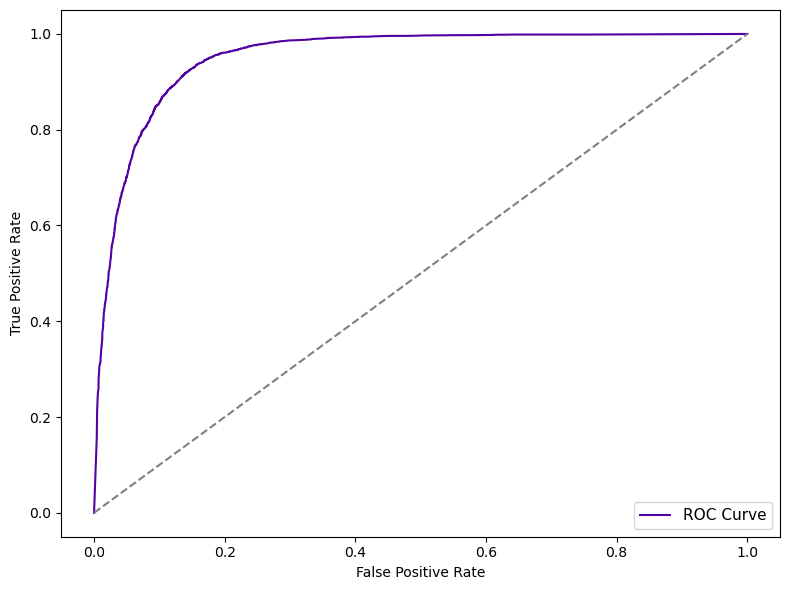

AUC Score: 0.9516092462903769


In [385]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Final_Model.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()

# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, Final_Model.predict_proba(x_test)[:, 1])
print("AUC Score:", auc_score)


In [386]:
import joblib
joblib.dump(Final_Model,"Census Income.pkl")

['Census Income.pkl']